In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress, skew
import datetime

(c1,c2,c3)=('#1b9e77','#d95f02','#7570b3')

In [2]:
met_dict = pickle.load(open('met_dict.p','rb'))

In [6]:
df = pickle.load(open('night_df.p','rb'))

In [7]:
np.min(df.index), np.max(df.index)

('1954-09-22 03:00:00_03', '1991-03-31 15:00:00_31')

In [8]:
df_cloudy_low = df[df['Low cloudiness']>9]
df_clear_total = df[df['Total cloudiness']<1]
df_clear_low = df[df['Low cloudiness']<1]
df_cloudy_high = df_clear_low[df_clear_low['Total cloudiness']>8]

High cloud mean: 0.37752717391304347
High cloud skew: 0.20654465994245916
Clear sky mean: 1.3098501303214596
Clear sky skew: 0.21447423030891988
Low cloud mean: 0.05419265419265419
Low cloud skew: 1.4319521385131875


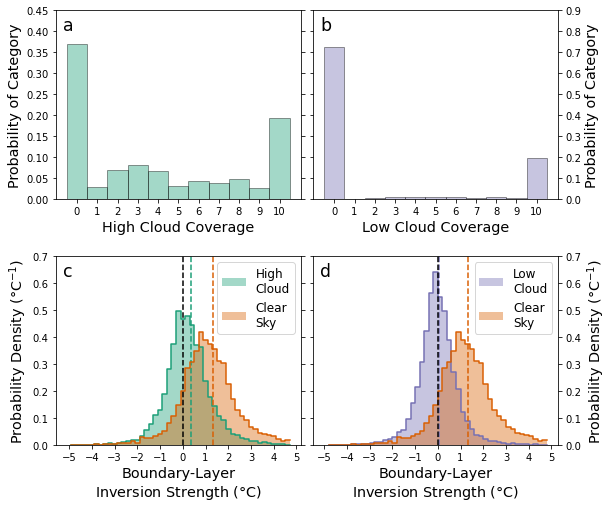

In [9]:
fig, axs = plt.subplots(2,2,figsize=(9,8))

ax1,ax2,ax3,ax4 = axs.reshape(-1)

alpha=0.4
bw = 0.2
bins=np.arange(-5,5,bw)


## AX1

p,x = np.histogram(df['Total cloudiness'][df['Low cloudiness']<1],bins=np.arange(-0.5,11,1),density=True)
ax1.bar(x[:-1]+0.5,p,color=c1,edgecolor='k',width=1,alpha=alpha)

ax1.set_xticks(np.arange(0,11,1))
ax1.set_ylabel('Probability of Category',fontsize='x-large')
ax1.set_xlabel('High Cloud Coverage',fontsize='x-large')
ax1.set_ylim(0,0.45)


# AX2

p,x = np.histogram(df['Low cloudiness'],bins=np.arange(-0.5,11,1),density=True)
ax2.bar(x[:-1]+0.5,p,color=c3,edgecolor='k',width=1,alpha=alpha)

ax2.set_xticks(np.arange(0,11,1))
ax2.set_ylabel('Probability of Category',fontsize='x-large')
ax2.set_xlabel('Low Cloud Coverage',fontsize='x-large')
ax2.set_ylim(0,0.9)


ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

####### AX3

# Plot High Cloud

p,x = np.histogram(df_cloudy_high['diff'],bins=bins,density=True)
mean = np.nanmean(df_cloudy_high['diff'])
ax3.bar(x[:-1],p,alpha=alpha,label='High\nCloud',width=bw,color=c1)
ax3.step(x[:-1]+(bw/2),p,color=c1)
ax3.axvline(mean,color=c1,ls='--')
print(f'High cloud mean: {mean}')
sk = skew(df_cloudy_high['diff'])
print(f'High cloud skew: {sk}')

p,x = np.histogram(df_clear_total['diff'],bins=bins,density=True)
mean = np.nanmean(df_clear_total['diff'])
ax3.bar(x[:-1],p,alpha=alpha,label='Clear\nSky',width=bw,color=c2)
ax3.step(x[:-1]+(bw/2),p,color=c2)
ax3.axvline(mean,color=c2,ls='--')
print(f'Clear sky mean: {mean}')
sk = skew(df_clear_total['diff'])
print(f'Clear sky skew: {sk}')

ax3.set_xlabel('Boundary-Layer\nInversion Strength ($\degree$C)',fontsize='x-large')
ax3.set_ylabel('Probability Density ($\degree$C$^{-1}$)',fontsize='x-large')
ax3.axvline(0,color='k',ls='--')
ax3.set_ylim(0,0.7)
ax3.legend(loc='upper right',fontsize='large')
ax3.set_xticks(np.arange(-5,5.1))

######## ax4

# Plot Low Cloud

p,x = np.histogram(df_cloudy_low['diff'],bins=bins,density=True)
mean = np.nanmean(df_cloudy_low['diff'])
ax4.bar(x[:-1]+(bw/2),p,alpha=alpha,label='Low\nCloud',width=bw,color=c3)
ax4.step(x[:-1]+bw,p,color=c3)
ax4.axvline(mean,color=c3,ls='--')
ax4.set_ylim(0,0.7)
sk = skew(df_cloudy_low['diff'])
print(f'Low cloud mean: {mean}')
print(f'Low cloud skew: {sk}')


# Plot Clear Sky

p,x = np.histogram(df_clear_total['diff'],bins=bins,density=True)
mean = np.nanmean(df_clear_total['diff'])
ax4.bar(x[:-1]+(bw/2),p,alpha=alpha,label='Clear\nSky',width=bw,color=c2)
ax4.axvline(mean,color=c2,ls='--')
ax4.step(x[:-1]+bw,p,color=c2)

ax4.set_xlabel('Boundary-Layer\nInversion Strength ($\degree$C)',fontsize='x-large')

ax4.set_ylabel('Probability Density ($\degree$C$^{-1}$)',fontsize='x-large')
ax4.axvline(0,color='k',ls='--')
ax4.legend(loc='upper right',fontsize='large')
ax4.set_xticks(np.arange(-5,5.1))
ax4.yaxis.set_label_position('right')
ax4.yaxis.tick_right()

for ax in [ax1,ax2,ax3,ax4]:
    ax.yaxis.set_ticks_position('both')


xl,yl = 0.03, 0.97

ax1.annotate(f'a',
             xycoords='axes fraction',
             xy=(xl,yl),
             va='top',
             fontsize='xx-large')

ax2.annotate(f'b',
             xycoords='axes fraction',
             xy=(xl,yl),
             va='top',
            fontsize='xx-large')

ax3.annotate(f'c',
             xycoords='axes fraction',
             xy=(xl,yl),
             va='top',
             fontsize='xx-large')

ax4.annotate(f'd',
             xycoords='axes fraction',
             xy=(xl,yl),
             va='top',
             fontsize='xx-large')

plt.subplots_adjust(wspace=0.05,hspace=0.3)

plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/Inversion/main_figs/clouds.png',dpi=400,bbox_inches='tight')

In [29]:
0.39/1.3, 0.07/1.30

(0.3, 0.05384615384615385)

In [30]:
df[np.isin(df['Low cloudiness'],[0,10])].shape[0] / df.shape[0]

0.8695854371512092

In [31]:
z = df_clear_low[df_clear_low['Total cloudiness']==0].shape[0]

In [32]:
t = df_clear_low[df_clear_low['Total cloudiness']==10].shape[0]

In [11]:
z/df_clear_low.shape[0], t/df_clear_low.shape[0], (z+t)/df_clear_low.shape[0]

(0.33746521629142423, 0.1814785265329156, 0.5189437428243399)

In [12]:
df_clear_low[np.isin(df_clear_low['Total cloudiness'],[0,10])].shape[0] / df_clear_low.shape[0]

0.5189437428243399

In [13]:
df_cloudy_high.shape, df_cloudy_low.shape, df_clear_total.shape

((10673, 15), (14084, 15), (17347, 15))

In [14]:
np.nanmean(df_clear_total['Air temperature']),np.nanmean(df_cloudy_high['Air temperature']),np.nanmean(df_cloudy_low['Air temperature'])

(-34.72288003689398, -27.025765951466315, -18.261892928145414)

In [15]:
np.nanmean(df_clear_total['Surface temperature']),np.nanmean(df_cloudy_high['Surface temperature']),np.nanmean(df_cloudy_low['Surface temperature'])

(-36.024499913529716, -27.41525344326806, -18.323345640443055)